# PREDICTION OF ENERGY LOAD OF RESIDENTIAL BUILDINGS
***
Sammy Yu  
InScope International  
May 20th, 2018
***

## I. Project Background

This dataset was created by Angeliki Xifara (Oxford, UK) for an energy analysis using 12 different building shapes simulated in Ecotect. The building differ with respect to the glazing area, the glazaing area distribution, and the orientation, amongst other parameters. The dataset owners simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses, namely **Heating Load** and **Cooling Load**.  

## II. Data Exploration
### Loading Data --

In [1]:
import pandas as pd

## Loading Data
data_raw = pd.read_excel(io='http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',sheet_name=0)

### Data Summary --

In [2]:
from IPython.display import display 
# Pretty display for notebooks
%matplotlib inline

# show the first few records after the data is loaded to a dataframe
print("The first 5 rows of the dataset:")
display(data_raw.head())

The first 5 rows of the dataset:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# rename the dataframe columns to be more meanlingful
data_raw = data_raw.rename(index=str, columns={
    'X1':'Relative_Compactness',
    'X2':'Surface_Area',
    'X3':'Wall_Area',
    'X4':'Roof_Area',
    'X5':'Overall_Height',
    'X6':'Orientation',
    'X7':'Glazing_Area',
    'X8':'Glazing_Dist',  # Glazing area distribution
    'Y1':'Heating_Load',  # response variable 1
    'Y2':'Cooling_Load'}) # response variable 2

display(data_raw.head(n=1))

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Dist,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33


In [4]:
## Statistics of the Data

# get the total number of rows in the dataset
n_records = data_raw.shape[0]
print("Total number of records: {}".format(n_records))

summary = data_raw.describe()
print("Statistics of each feature of the dataset:")
display(summary)


Total number of records: 768
Statistics of each feature of the dataset:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Dist,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## III. Exploratory Visualization

In [5]:
%matplotlib inline

from IPython.display import display 

numerical = ['Relative_Compactness','Surface_Area', 'Wall_Area','Roof_Area','Overall_Height','Glazing_Area']
categorical = ['Orientation','Glazing_Dist']
responseColNames = ['Heating_Load', 'Cooling_Load']

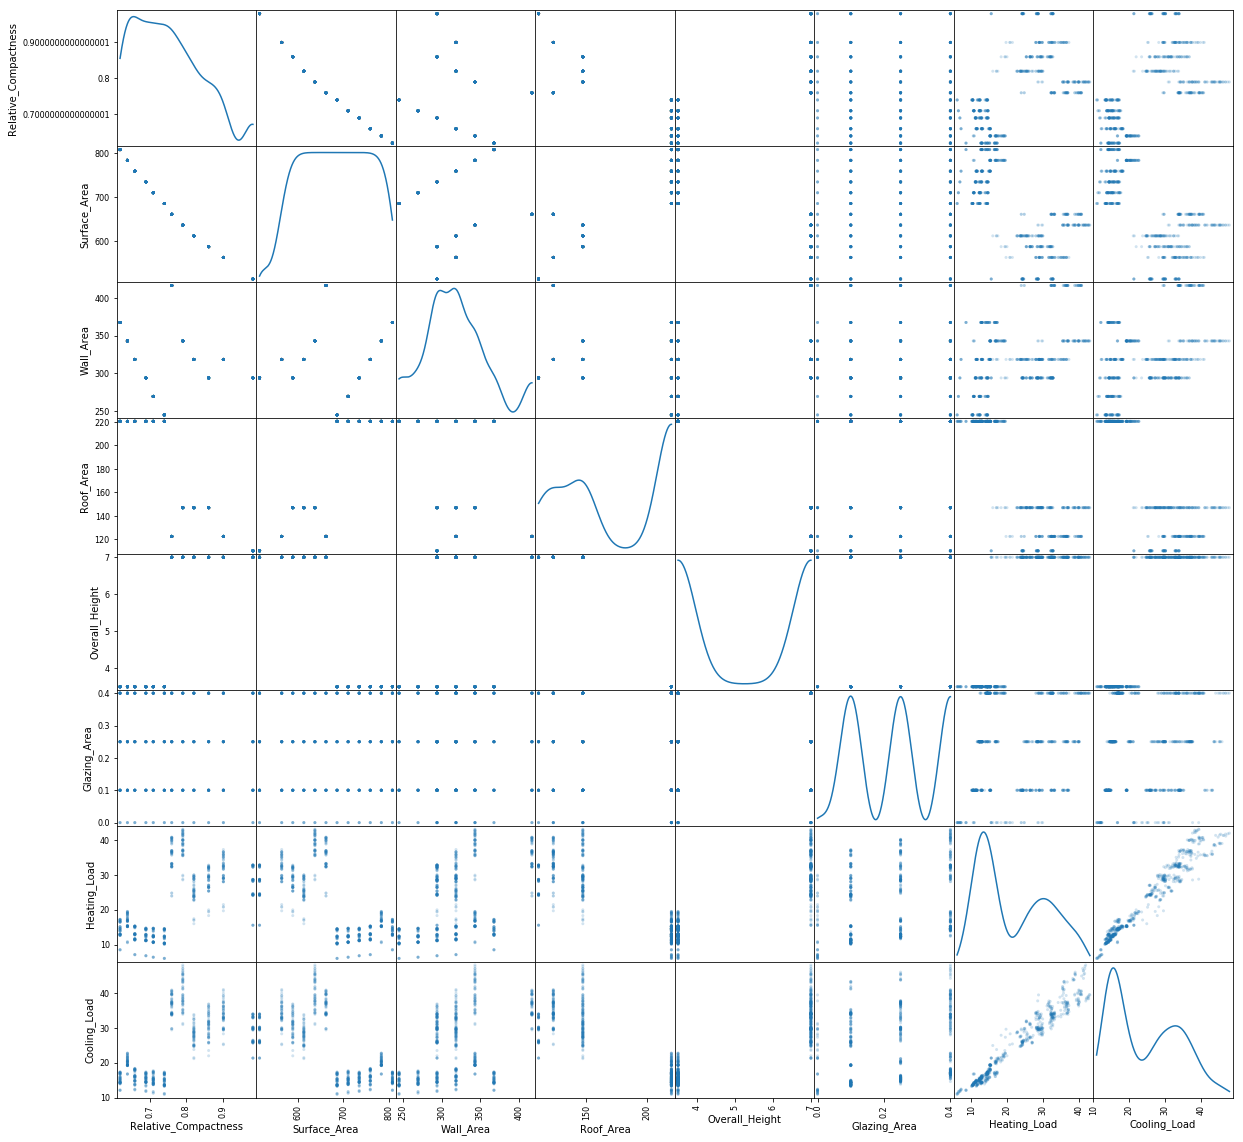

In [6]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

# plot the scatter matrix to visualize the correlation between features and response variables
scatter_matrix(data_raw[numerical + responseColNames], alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()


### Correlation Matrix --

In [7]:
print("Correlation Coefficients of the Continuous Features:")
display(data_raw[numerical + responseColNames].corr().apply(lambda x: round(x, 3)))

Correlation Coefficients of the Continuous Features:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load,Cooling_Load
Relative_Compactness,1.000,-0.992,-0.204,-0.869,0.828,0.000,0.622,0.634
Surface_Area,-0.992,1.000,0.196,0.881,-0.858,0.000,-0.658,-0.673
Wall_Area,-0.204,0.196,1.000,-0.292,0.281,-0.000,0.456,0.427
Roof_Area,-0.869,0.881,-0.292,1.000,-0.973,-0.000,-0.862,-0.863
Overall_Height,0.828,-0.858,0.281,-0.973,1.000,0.000,0.889,0.896
Glazing_Area,0.000,0.000,-0.000,-0.000,0.000,1.000,0.270,0.208
Heating_Load,0.622,-0.658,0.456,-0.862,0.889,0.270,1.000,0.976
Cooling_Load,0.634,-0.673,0.427,-0.863,0.896,0.208,0.976,1.000


## IV. Data Preprocessing

### Missing Data Handling --

In [8]:
## Check Missing Values

# get the record counts for each column from the summary
counts = summary.loc['count',:]
# get the number of rows with missing values
n_records_missing_values = counts[counts != n_records].size
if n_records_missing_values == 0:
    print('No missing value found in the data')
else:
    print('Missing values exist!')

No missing value found in the data


### Feature Scaling --

In [9]:
## Numerical Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = data_raw
data[numerical] = scaler.fit_transform(data_raw[numerical])

### Feature Transformation --

In [10]:
## Output variable tranformation
import numpy as np

# log transform the output variable to minimize its skewness
data[responseColNames] = data[responseColNames].apply(lambda x: np.log(x))

### Feature Encoding --

In [11]:
## Categorical Feature Encoding

# One-hot encode the categorical features using pandas.get_dummies()
data = pd.get_dummies(data, columns = categorical)

summary = data.describe()
print("Statistics of each feature of the dataset after preprocessing:")
display(summary)


Statistics of each feature of the dataset after preprocessing:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load,Cooling_Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,Glazing_Dist_0,Glazing_Dist_1,Glazing_Dist_2,Glazing_Dist_3,Glazing_Dist_4,Glazing_Dist_5
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-1.451385e-16,-4.440892e-16,-1.734723e-18,3.709417e-16,0.000000,2.064321e-15,2.995968,3.126081,0.250000,0.250000,0.250000,0.250000,0.062500,0.187500,0.187500,0.187500,0.187500,0.187500
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,0.476635,0.392737,0.433295,0.433295,0.433295,0.433295,0.242219,0.390567,0.390567,0.390567,0.390567,0.390567
min,-1.363812e+00,-1.785875e+00,-1.685854e+00,-1.470077e+00,-1.000000,-1.760447e+00,1.793425,2.388763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.725642e-01,-7.421818e-01,-5.619515e-01,-7.915797e-01,-1.000000,-1.009323e+00,2.564372,2.748552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.340162e-01,2.319318e-02,0.000000e+00,1.583159e-01,0.000000,1.173631e-01,2.941800,3.094672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.227813e-01,7.885681e-01,5.619515e-01,9.725122e-01,1.000000,1.244049e+00,3.455291,3.500515,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.041777e+00,1.553943e+00,2.247806e+00,9.725122e-01,1.000000,1.244049e+00,3.763523,3.871826,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# separate feature columns and output column 
output = data[responseColNames]
features = data.drop(responseColNames, axis = 1)


featureColNames = list(features)

### Feature Box Plots After Preprocessing --

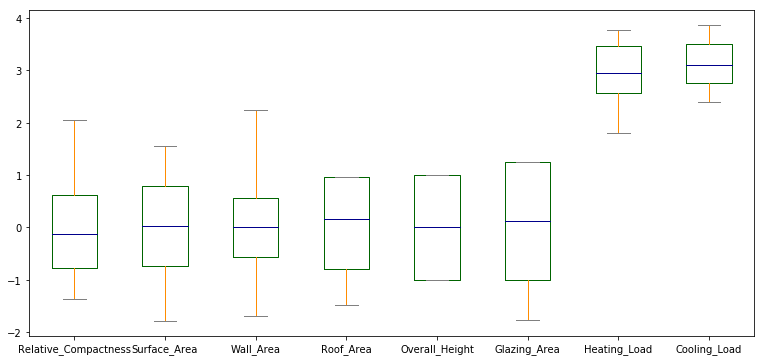

In [13]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data[numerical + responseColNames].plot.box(color=color, sym='r+', figsize=(13, 6) )

## V. Implementation

### Benchmark Model --

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mean_benchmark = output.mean()
predictions_benchmark = np.full(output.shape, mean_benchmark)
mse_benchmark = mean_squared_error(output, predictions_benchmark)
r2_benchmark = r2_score(output, predictions_benchmark)

print(round(mean_benchmark,3))
print("\nBenchmark Scores:")
print("\n\tpredicted heating and cooling load: ".format(round(mean_benchmark, 3)))
print("\n\tMean Squared Errors: ".format(round(mse_benchmark, 3)))
print("\n\tR2 Score: ".format(round(r2_benchmark, 3)))

Heating_Load    2.996
Cooling_Load    3.126
dtype: float64

Benchmark Scores:

	predicted heating and cooling load: 

	Mean Squared Errors: 

	R2 Score: 


### Dataset Splitting --

In [ ]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(features, output, test_size=.15, random_state=12)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=.15, random_state=12)

# Train set (72.25%): x_train, y_train
# Validation set (12.75%): x_val, y_val
# Test set (15%): x_test, y_test

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def train_predict(learner, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: defaulted training set
       - X_val: features validation set
       - y_val: defaulted validation set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    learner = learner.fit(X_train, y_train)
            
    # Get the predictions on the training and validation set,
    predictions_train = learner.predict(X_train)
    predictions_val = learner.predict(X_val)
    
    # Compute mean squared errors on the validation and test set
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
    results['mse_val'] = mean_squared_error(y_val, predictions_val)
            
    # Compute coefficient of determination (R^2) on the validation and test set
    results['r2_train'] = r2_score(y_train, predictions_train)
    results['r2_val'] = r2_score(y_val, predictions_val)

    # Success
    print("\n{} training results:".format(learner.__class__.__name__))
    print("\n\tTraining Mean Squared Errors: {0:.3f}".format(results['mse_train']))
    print("\n\tValidation Mean Squared Errors: {0:.3f}".format(results['mse_val']))
    print("\n\tTraining R2 Score: {0:.3f}".format(results['r2_train']))
    print("\n\tValidation R2 Score: {0:.3f}".format(results['r2_val']))


In [ ]:
## Model Training
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
rgs_A = LinearRegression()
# Lasso Regression
rgs_B = linear_model.Lasso()
# Random Forest Regression
rgs_C = RandomForestRegressor(random_state = 12)

for rgs in [rgs_A, rgs_B, rgs_C]:
    train_predict(rgs, x_train, y_train, x_val, y_val)

## VI. Refinement

### The Initial LASSO (least absolute shrinkage and selection operator) Model --

In [ ]:
import Helper

print("\n\t" + Helper.GetRegressionModelFormula(outputColName, featureColNames, round(rgs_B.intercept_, 3), rgs_B.coef_.round(3)))

### LASSO Model Tuning --

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import scipy

def fine_tune_Lasso_model(X_train, y_train, X_val, y_val):
    '''
    inputs:
       - X_train: features training set
       - y_train: defaulted training set
       - X_val: features validation set
       - y_val: defaulted validation set
    '''

    # Initialize the classifier
    n_estimators = 10
    rgs = linear_model.Lasso(random_state=12)

    # Create the parameters list
    parameters = {'alpha': scipy.stats.expon(scale=0.02)}

    # Make an r2_score scoring object
    scorer = make_scorer(r2_score)

    # Perform randomized search on the regressor using 'scorer' as the scoring method and 10-folds cross validation
    search_obj = RandomizedSearchCV(rgs, param_distributions= parameters, scoring=scorer, cv=10,
                                  n_jobs=-1, error_score=0, n_iter=1, random_state=12)

    # Fit the randomized search object to the training data and find the optimal parameters
    search_fit = search_obj.fit(X_train, y_train)
    print("Best parameters: ", search_fit.best_params_)
    print()

    # Get the estimator
    best_rgs = search_fit.best_estimator_

    # Make predictions using the unoptimized and optimized model
    predictions = (rgs.fit(X_train, y_train)).predict(X_val)
    best_predictions = best_rgs.predict(X_val)

    # Report the before-and-afterscores
    print("Unoptimized model\n------------")
    print("\tValidation Mean Squared Errors: {0:.3f}".format(mean_squared_error(y_val, predictions)))
    print("\n\tValidation R2 Score: {0:.3f}".format(r2_score(y_val, predictions)))
    print("\nOptimized Model\n------------")
    print("\tValidation Mean Squared Errors: {0:.3f}".format(mean_squared_error(y_val, best_predictions)))
    print("\n\tValidation R2 Score: {0:.3f}".format(r2_score(y_val, best_predictions)))
    print()
    formula = Helper.GetRegressionModelFormula(outputColName, featureColNames, round(best_rgs.intercept_, 3), best_rgs.coef_.round(3))
    print("\n\tModel: {}".format(formula))
    
    return best_rgs

best_rgs = fine_tune_Lasso_model(x_train, y_train, x_val, y_val)

## VII. Results

### Residual Analysis --

In [ ]:
Helper.ModelPerformancePlots(best_rgs, x_val, y_val)

### Final Model Testing --

In [ ]:
test_predictions = best_rgs.predict(x_test)
print("Mean Squared Errors on unseen test data: {0:.3f}".format(mean_squared_error(y_test, test_predictions)))
print("R2 Score on unseen test data: {0:.3f}".format(r2_score(y_test, test_predictions)))
